### Topic Analysis using Top2Vec (Community Dataset #2: 15/12/2020 - 31/01/2021)

#### Import core libraries

In [3]:
# Import Core library
import sys
import re, numpy as np, pandas as pd, matplotlib.pyplot as plt, nltk
import emoji
from pprint import pprint
from cleantext import clean
from top2vec import Top2Vec

In [4]:
# Import Dataset
df = pd.read_excel('../Community306_raw.xlsx')

In [5]:
df.head()

Unnamed: 0            id  source_id          created_at geo_source  \
0           1  1.346170e+18         18 2021-01-04 19:01:23          1   
1           3  1.345954e+18         18 2021-01-04 04:45:23       None   
2           4  1.345954e+18         18 2021-01-04 04:45:13       None   
3           5  1.345952e+18         18 2021-01-04 04:34:34       None   
4           6  1.345825e+18         18 2021-01-03 20:12:15       None   

   truncated                                               text  \
0          0  @HHere4trump @sbacon0410 #stopthesteal #stopth...   
1          0  @RudyGiuliani @CaliConserv1 #StoptheSteal #Sto...   
2          0  #StoptheSteal #StoptheSteal #StoptheSteal #Sto...   
3          0  #StoptheSteal #StoptheSteal #StoptheSteal #Sto...   
4          0  @realDonaldTrump @4Libertyinlaw #StoptheSteal ...   

  text_sentiment text_toxicity lang  ...  retweet_id_str  is_quote_status  \
0           None          None  und  ...            None                0   
1           None          None  und  ...            None                0   
2           None          None  und  ...            None                0   
3           None          None  und  ...            None                0   
4           None          None  und  ...            None                0   

   quoted_status_id_str  in_reply_to_status_id_str  in_reply_to_user_id_str  \
0                  None        1346156649287987201                     None   
1                  None        1345924505483546624                     None   
2   1345924505483546624                       None                     None   
3   1345933290654593024                       None                     None   
4                  None        1345798202650460162                     None   

   in_reply_to_screen_name                                           entities  \
0                     None  {"entities": {"hashtags": [{"end": 38, "tag": ...   
1                     None  {"entities": {"hashtags": [{"end": 41, "tag": ...   
2                     None  {"entities": {"urls": [{"end": 303, "url": "ht...   
3                     None  {"entities": {"urls": [{"end": 303, "url": "ht...   
4                     None  {"entities": {"hashtags": [{"end": 45, "tag": ...   

   possibly_sensitive coordinates place  
0                   0        None  None  
1                   0        None  None  
2                   0        None  None  
3                   0        None  None  
4                   0        None  None  

[5 rows x 26 columns]

In [6]:
df['text'].head()

0    @HHere4trump @sbacon0410 #stopthesteal #stopth...
1    @RudyGiuliani @CaliConserv1 #StoptheSteal #Sto...
2    #StoptheSteal #StoptheSteal #StoptheSteal #Sto...
3    #StoptheSteal #StoptheSteal #StoptheSteal #Sto...
4    @realDonaldTrump @4Libertyinlaw #StoptheSteal ...
Name: text, dtype: object

In [7]:
df['create_year'] = pd.to_datetime(df.created_at, format='%d/%m/%Y', errors='coerce')
df['year'] = pd.to_datetime(df.created_at).dt.strftime('%Y')
df['month'] = pd.to_datetime(df.created_at).dt.strftime('%m')

In [8]:
start_date = "15/12/2020"
end_date = "31/01/2021"
after_start_date = df['create_year'] > start_date
before_end_date = df['create_year'] < end_date
between_two_dates = after_start_date & before_end_date

stream_one = df.loc[between_two_dates]

In [9]:
stream_one.head()

Unnamed: 0            id  source_id          created_at geo_source  \
0           1  1.346170e+18         18 2021-01-04 19:01:23          1   
1           3  1.345954e+18         18 2021-01-04 04:45:23       None   
2           4  1.345954e+18         18 2021-01-04 04:45:13       None   
3           5  1.345952e+18         18 2021-01-04 04:34:34       None   
4           6  1.345825e+18         18 2021-01-03 20:12:15       None   

   truncated                                               text  \
0          0  @HHere4trump @sbacon0410 #stopthesteal #stopth...   
1          0  @RudyGiuliani @CaliConserv1 #StoptheSteal #Sto...   
2          0  #StoptheSteal #StoptheSteal #StoptheSteal #Sto...   
3          0  #StoptheSteal #StoptheSteal #StoptheSteal #Sto...   
4          0  @realDonaldTrump @4Libertyinlaw #StoptheSteal ...   

  text_sentiment text_toxicity lang  ...  in_reply_to_status_id_str  \
0           None          None  und  ...        1346156649287987201   
1           None          None  und  ...        1345924505483546624   
2           None          None  und  ...                       None   
3           None          None  und  ...                       None   
4           None          None  und  ...        1345798202650460162   

   in_reply_to_user_id_str  in_reply_to_screen_name  \
0                     None                     None   
1                     None                     None   
2                     None                     None   
3                     None                     None   
4                     None                     None   

                                            entities  possibly_sensitive  \
0  {"entities": {"hashtags": [{"end": 38, "tag": ...                   0   
1  {"entities": {"hashtags": [{"end": 41, "tag": ...                   0   
2  {"entities": {"urls": [{"end": 303, "url": "ht...                   0   
3  {"entities": {"urls": [{"end": 303, "url": "ht...                   0   
4  {"entities": {"hashtags": [{"end": 45, "tag": ...                   0   

   coordinates place         create_year  year month  
0         None  None 2021-01-04 19:01:23  2021    01  
1         None  None 2021-01-04 04:45:23  2021    01  
2         None  None 2021-01-04 04:45:13  2021    01  
3         None  None 2021-01-04 04:34:34  2021    01  
4         None  None 2021-01-03 20:12:15  2021    01  

[5 rows x 29 columns]

#### Process Corpus Dataset

In [10]:
# Convert to list
data = stream_one['text'].values.tolist()

# Make characters lowercase
data = [word.lower() for word in data]

In [ ]:
data[:20]

In [12]:
def get_url_patern():
    return re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))'
        r'[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})')

def get_hashtags_pattern():
    return re.compile(r'#\w*')

def get_twitter_reserved_words_pattern():
    return re.compile(r'(RT|rt|FAV|fav|VIA|via)')

def get_mentions_pattern():
    return re.compile(r'@\w*')

def process_text(word):
  word=re.sub(pattern=get_url_patern(), repl='', string=word)
  word=re.sub(pattern=get_mentions_pattern(), repl='', string=word)
  word=re.sub(pattern=get_hashtags_pattern(), repl='', string=word)
  word=re.sub(pattern=get_twitter_reserved_words_pattern(), repl='', string=word)
  word=re.sub(r'http\S+', '', word)  # remove http links
  word=re.sub(r'bit.ly/\S+', '', word)  # rempve bitly links
  word=word.strip('[link]')  # remove [links]
  word=re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', word)  # remove retweet
  word=re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', word)  # remove tweeted at
  word=clean(word, no_emoji=True)
  word = word.strip()
  return word

In [13]:
data = [process_text(word) for word in data]

#### Build Top2Vec Model

In [14]:
model = Top2Vec(data)

2022-03-21 14:17:36,259 - top2vec - INFO - Pre-processing documents for training
2022-03-21 14:17:38,710 - top2vec - INFO - Creating joint document/word embedding
2022-03-21 14:19:58,439 - top2vec - INFO - Creating lower dimension embedding of documents
2022-03-21 14:21:15,621 - top2vec - INFO - Finding dense areas of documents
2022-03-21 14:21:22,434 - top2vec - INFO - Finding topics


In [15]:
model.get_num_topics()

701

In [52]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [48]:
# Get topic words, word scores and topic numbers
# topic_words, word_scores, topic_nums = model.get_topics(1)

#### Visualize Topic Distribution and Keywords

In [53]:
topic_dist = pd.DataFrame()

for topic_number in topic_nums:
    documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=topic_number, num_docs=1)
    topic_dist = topic_dist.append(pd.Series([topic_number, model.topic_words[topic_number]]), ignore_index=True)
    
topic_dist.columns = ['Topic_Number', 'Topic_Words']

In [54]:
top_10_dist = topic_dist.head(10)
top_10_dist

Topic_Number                                        Topic_Words
0           0.0  [cc, legitimate, accept, counted, stolen, over...
1           1.0  [flight, kicked, wearing, joke, suppoer, mask,...
2           2.0  [cap, location, inciter, minutes, tweeted, thr...
3           3.0  [plaza, coalition, pre, live, freedom, toronto...
4           4.0  [matte, refused, idiot, guard, calling, mayor,...
5           5.0  [supp, vet, combat, asked, event, speak, pro, ...
6           6.0  [solution, judicial, exercise, thei, legislatu...
7           7.0  [coalition, conference, press, rsbn, hold, pla...
8           8.0  [diego, paged, airpo, san, wil, breathtaking, ...
9           9.0  [overflowing, maga, millions, compromise, stan...

In [58]:
# Export topics attached to top 10 original tweets as excel file
top_10_dist.to_excel(r"C:\Users\Ivory-UALR\Documents\COSMOS\Billy's Project\community_topic_model\2nd_community_dataset\topics_top10_tweets_2nd_analysis.xlsx")

In [22]:
topics_10 = topic_nums[:10]

#### Word cloud visualization for Community Dataset #2

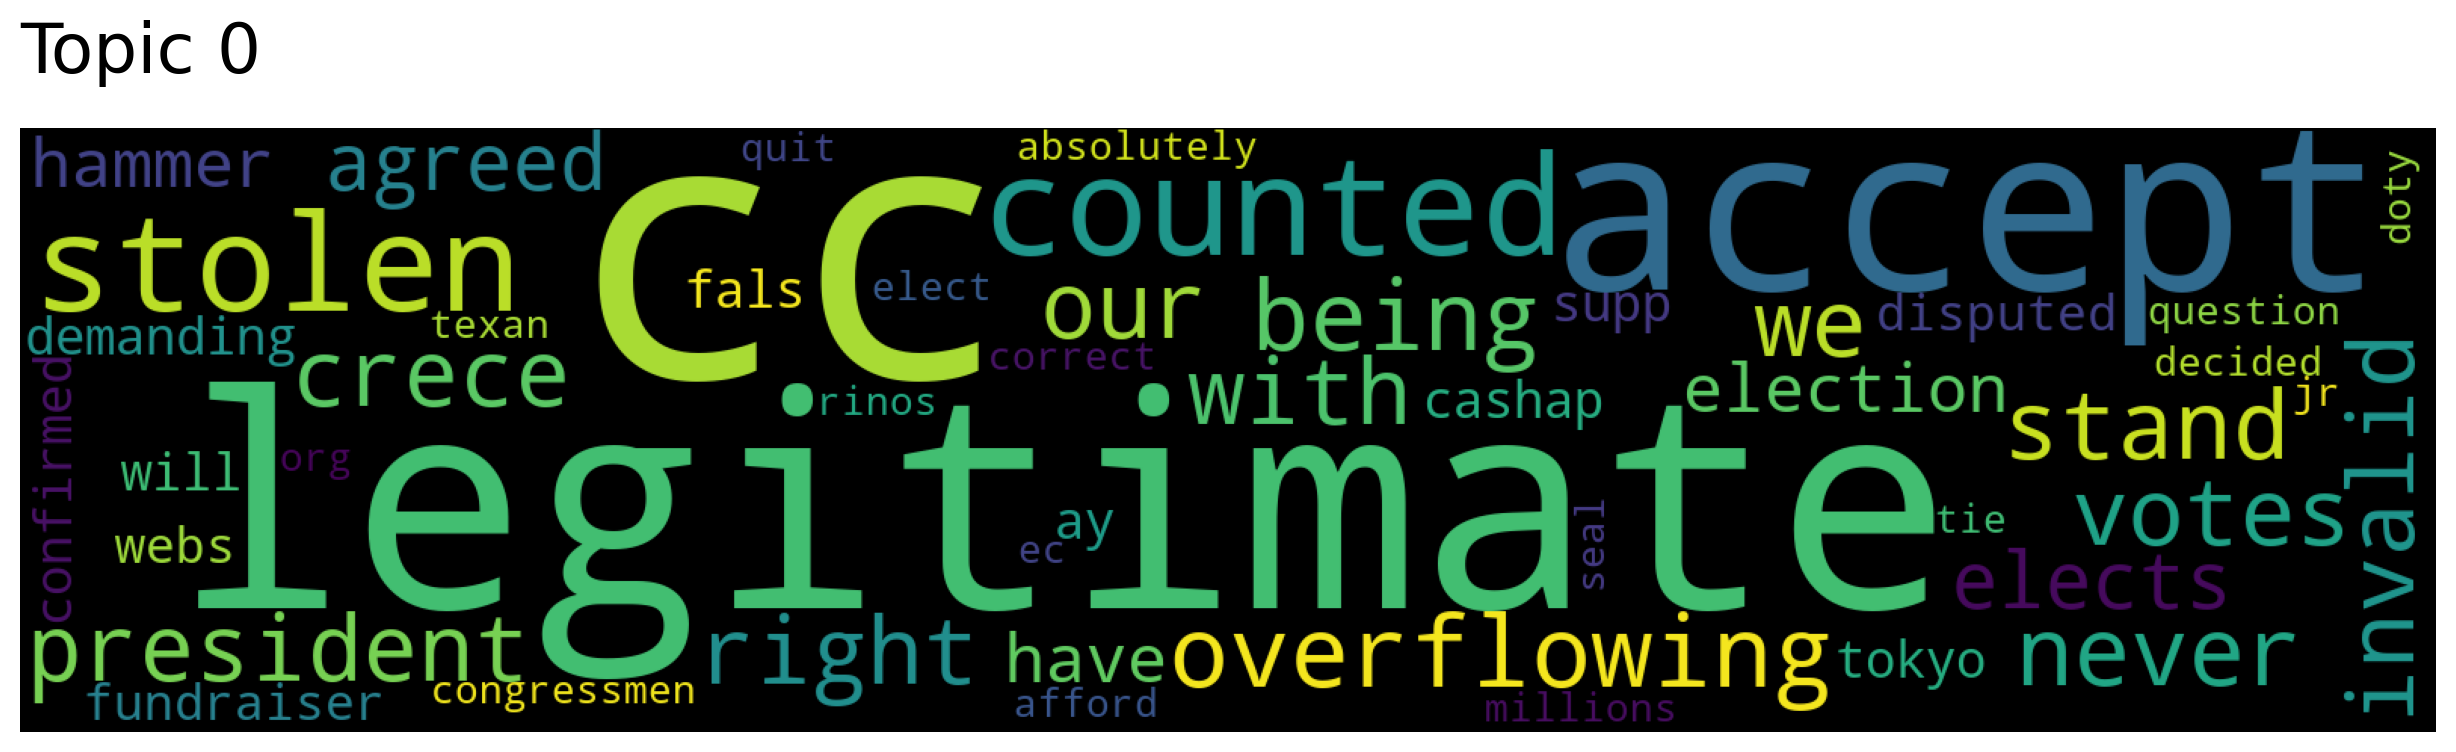

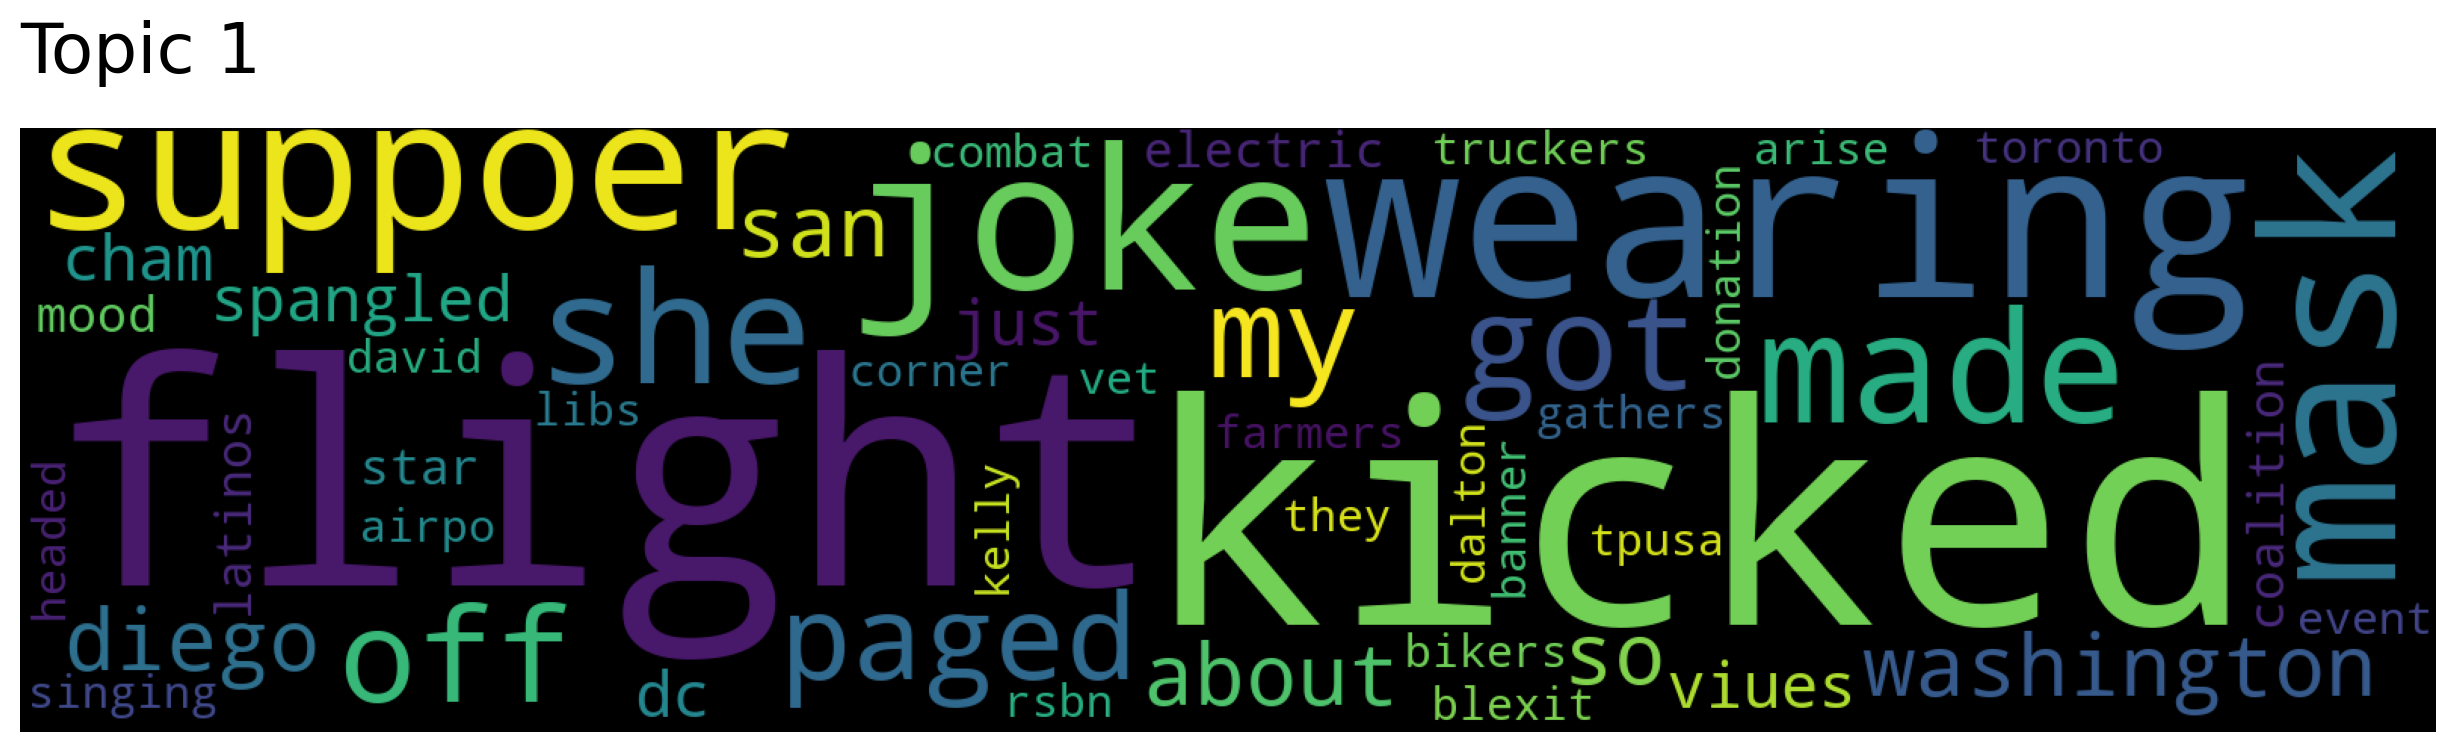

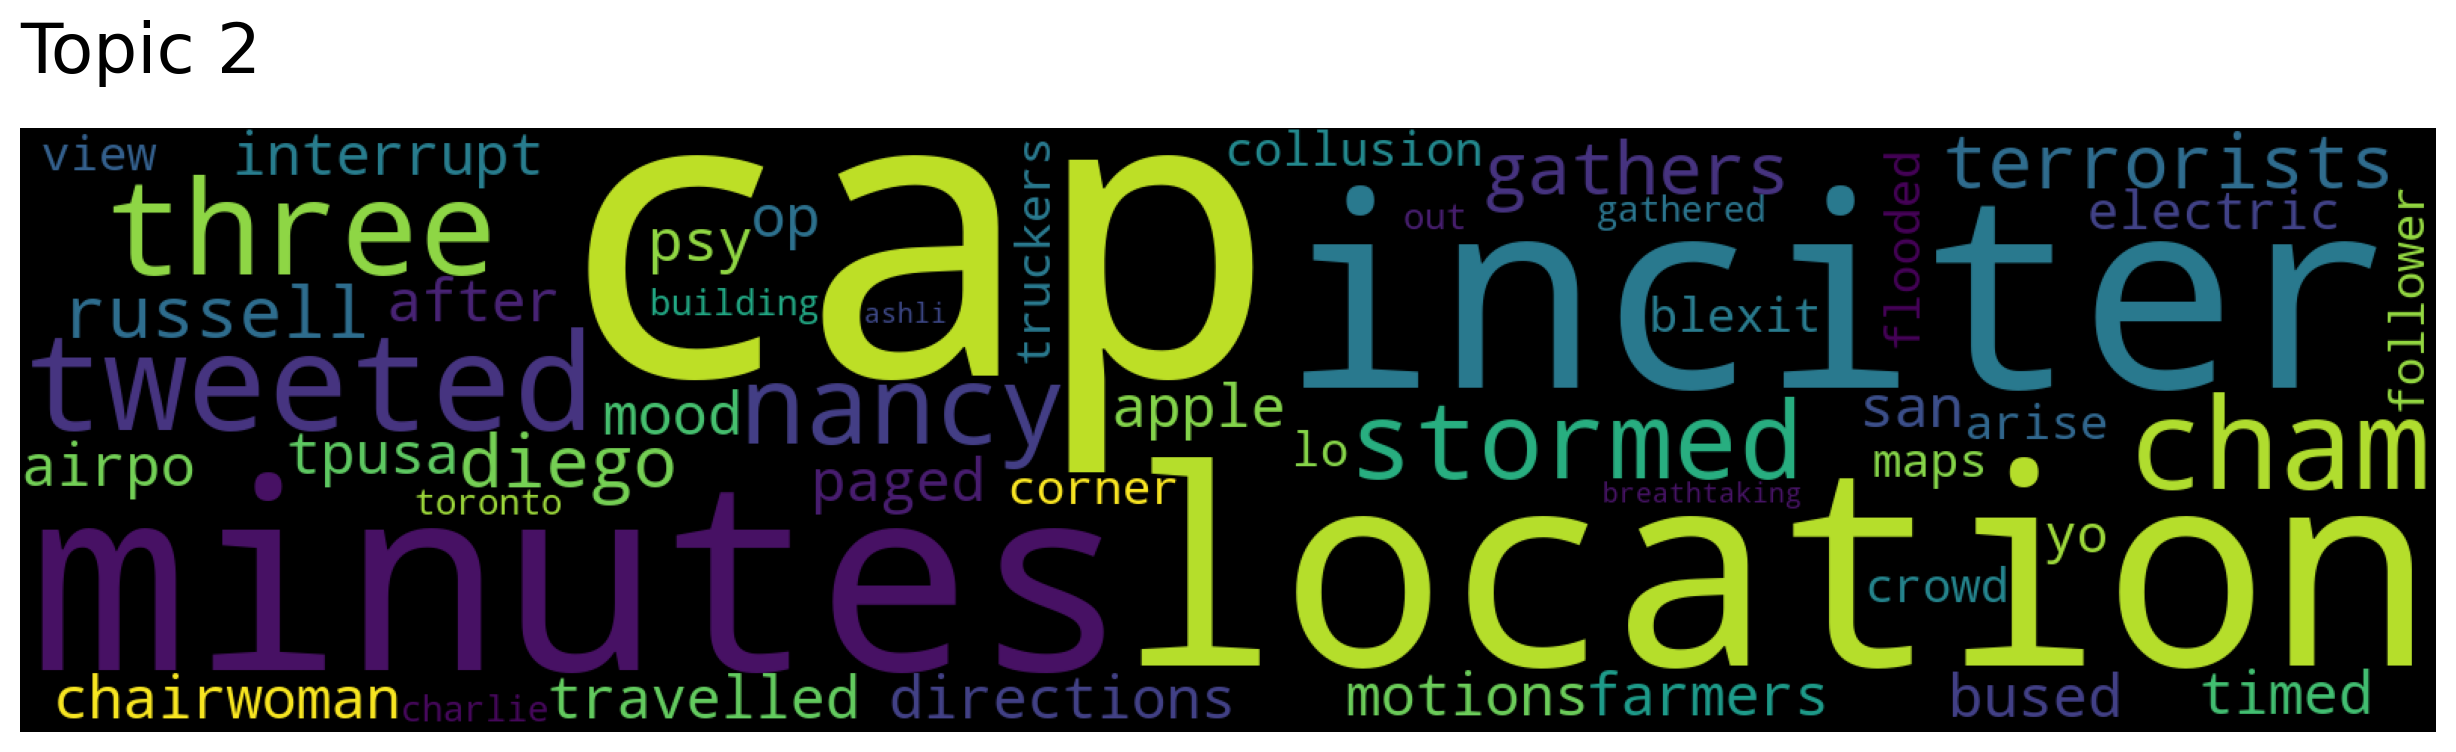

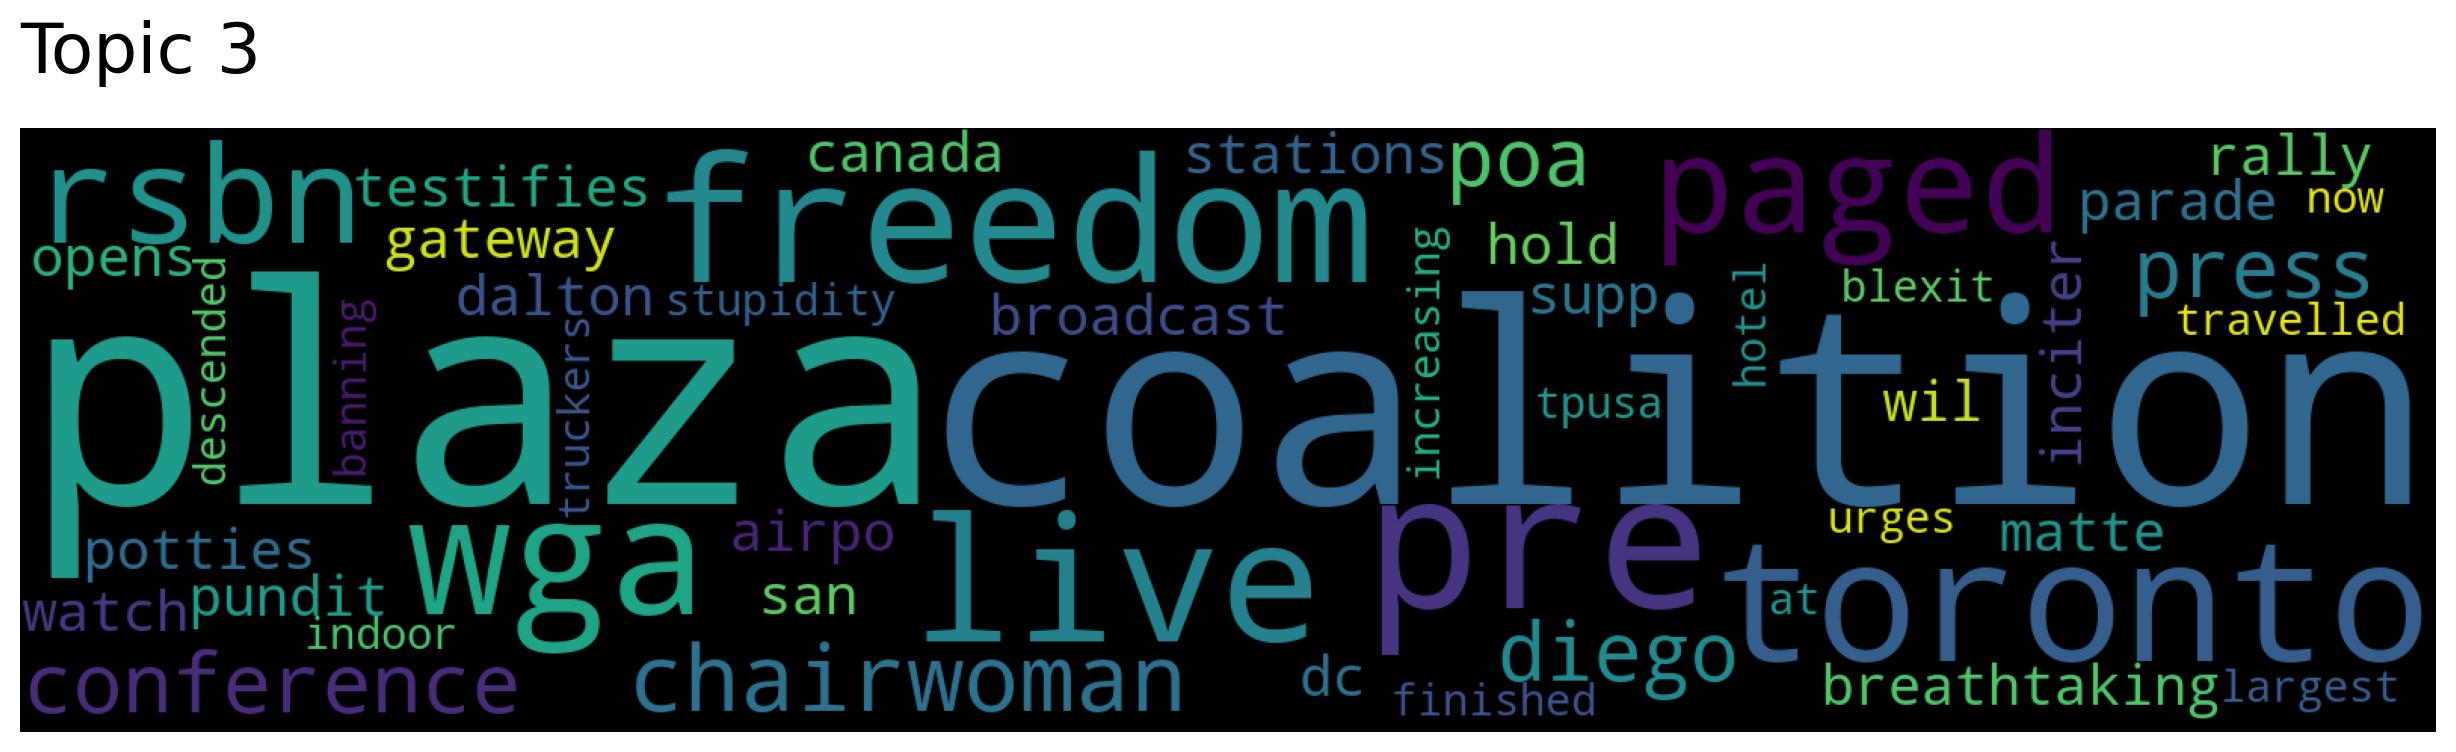

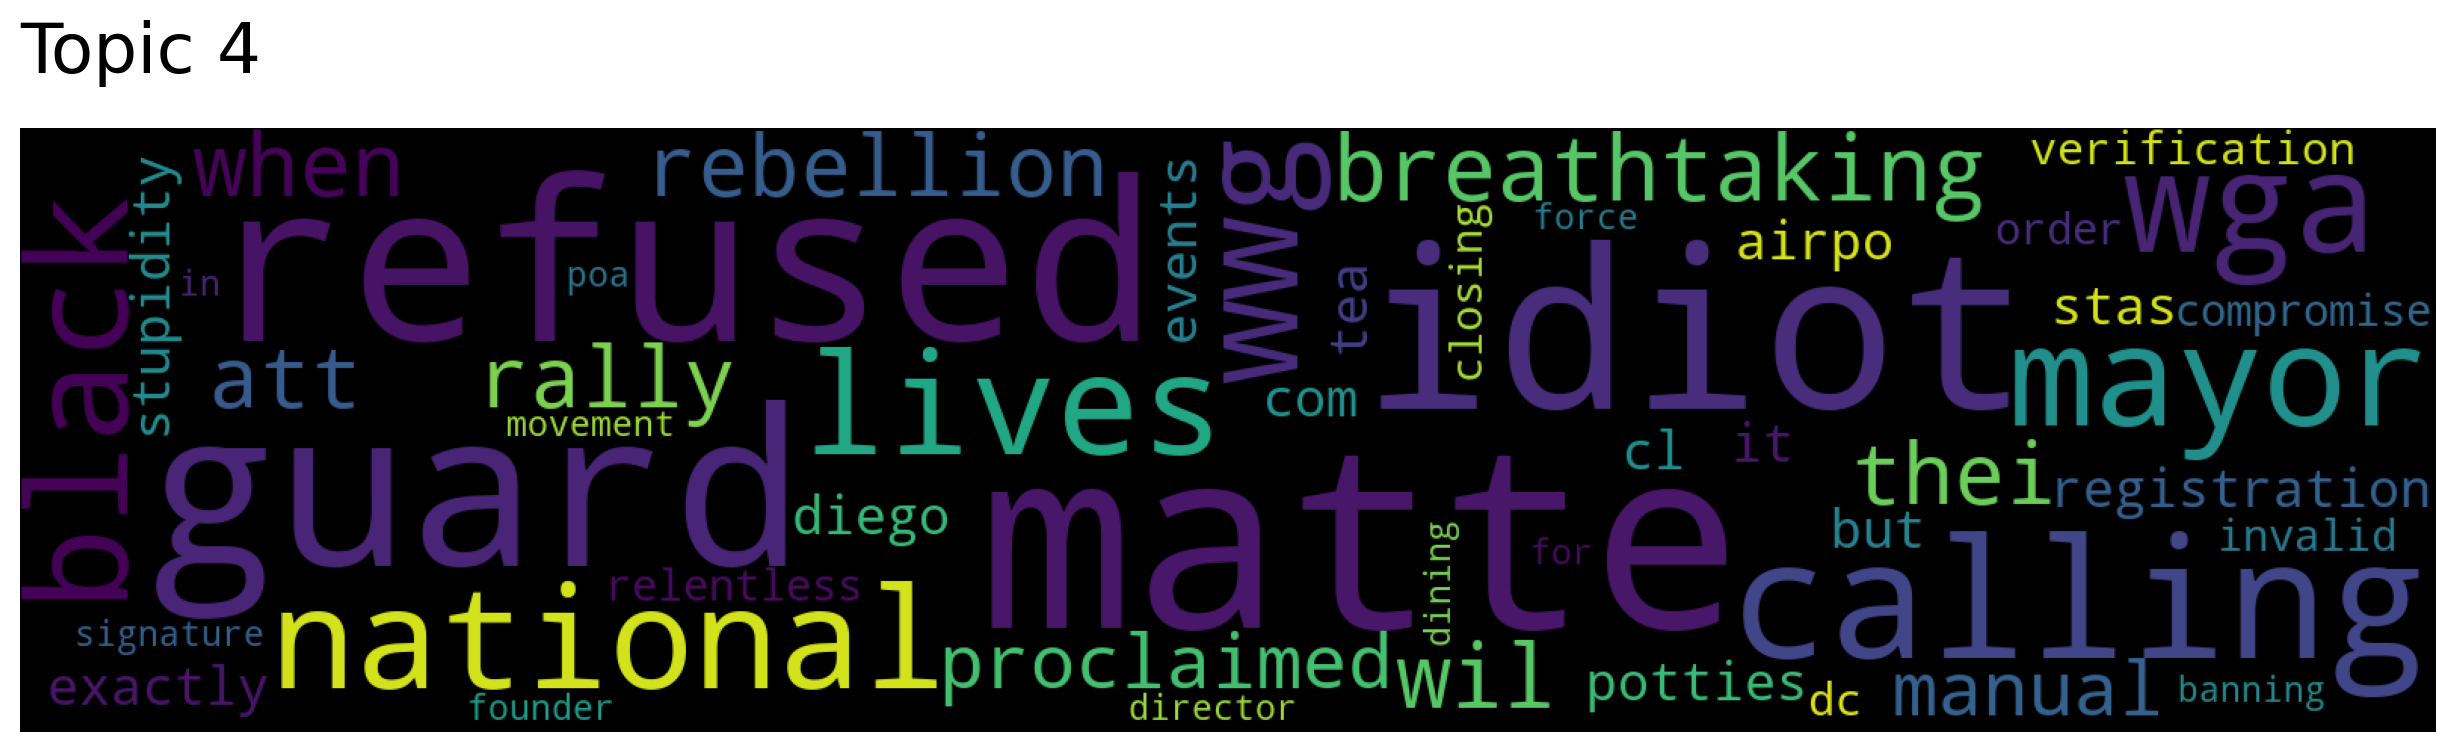

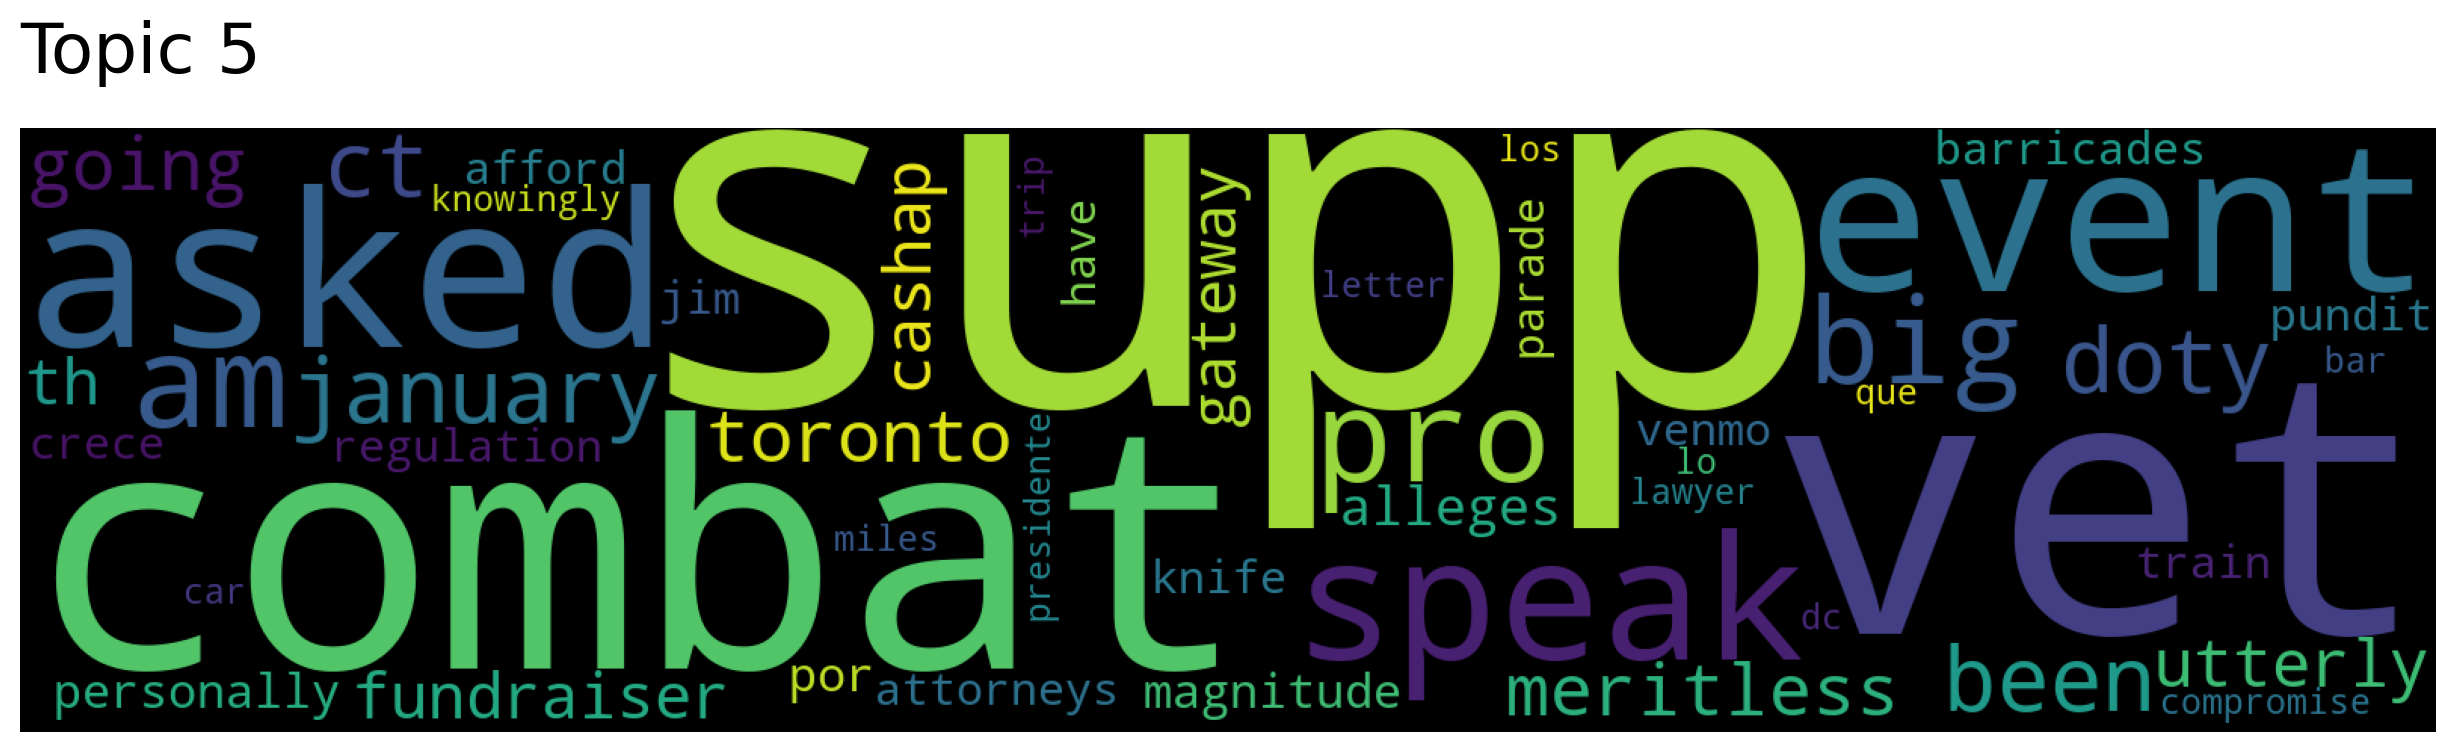

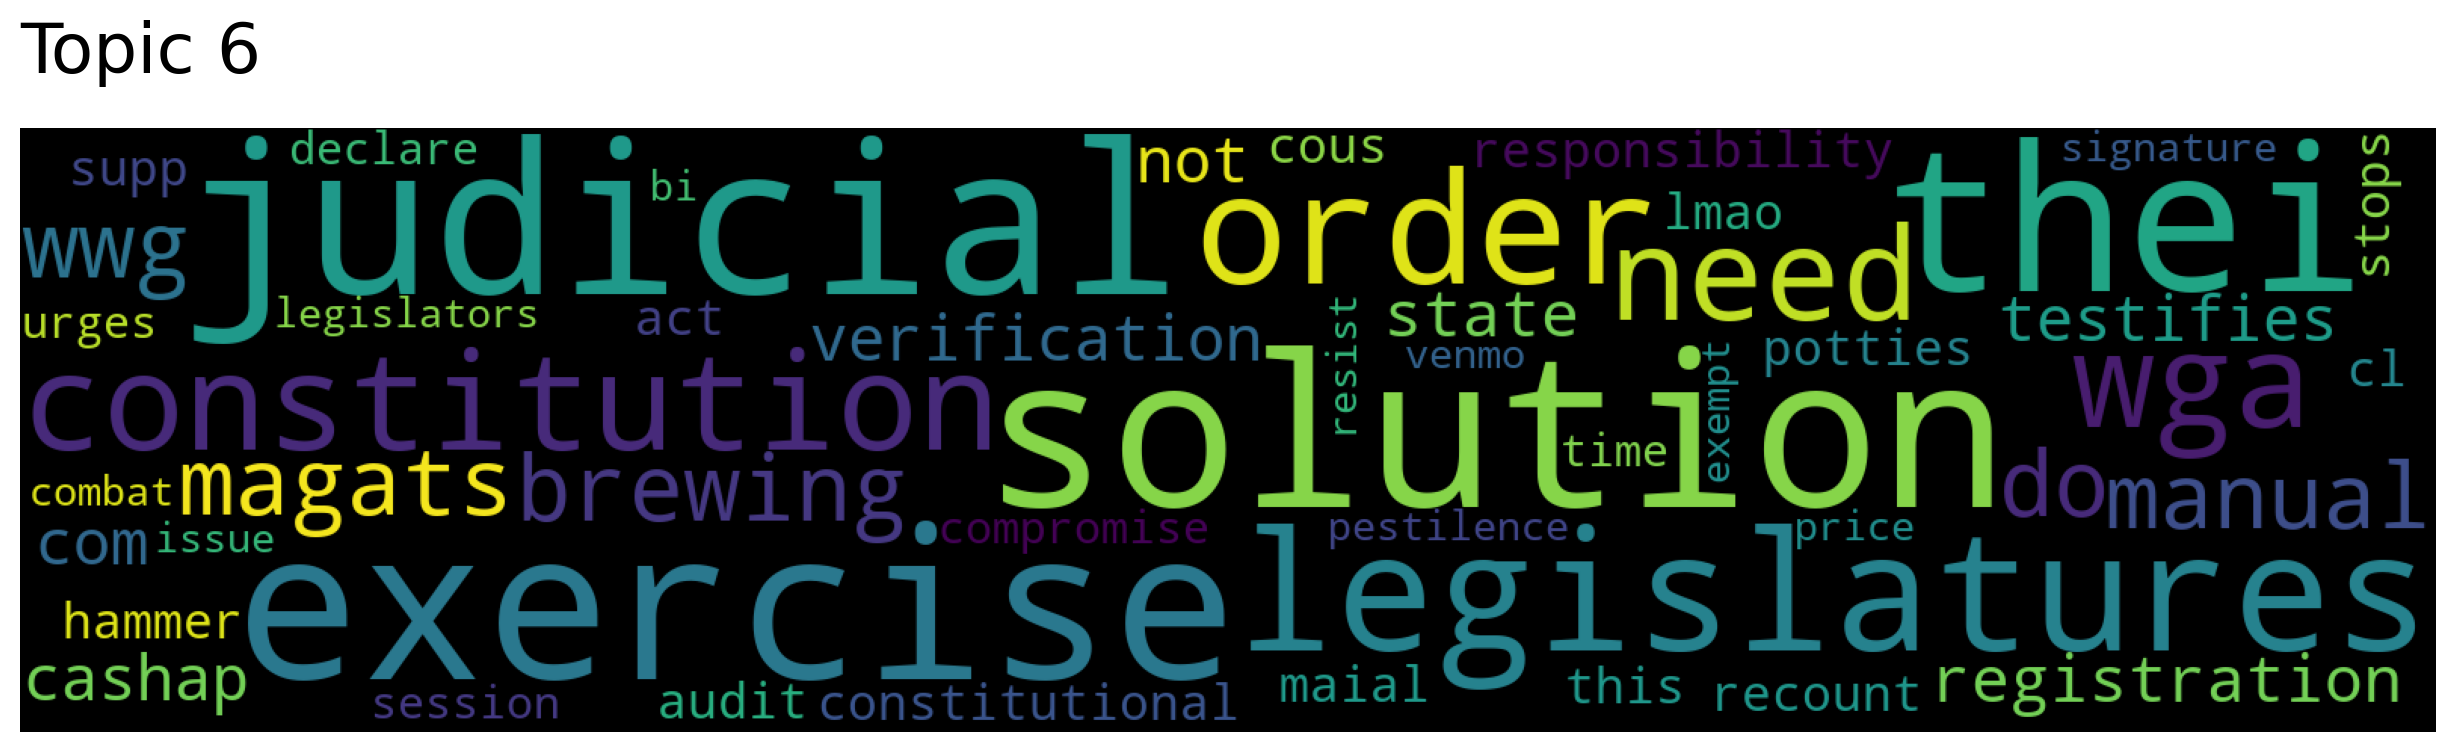

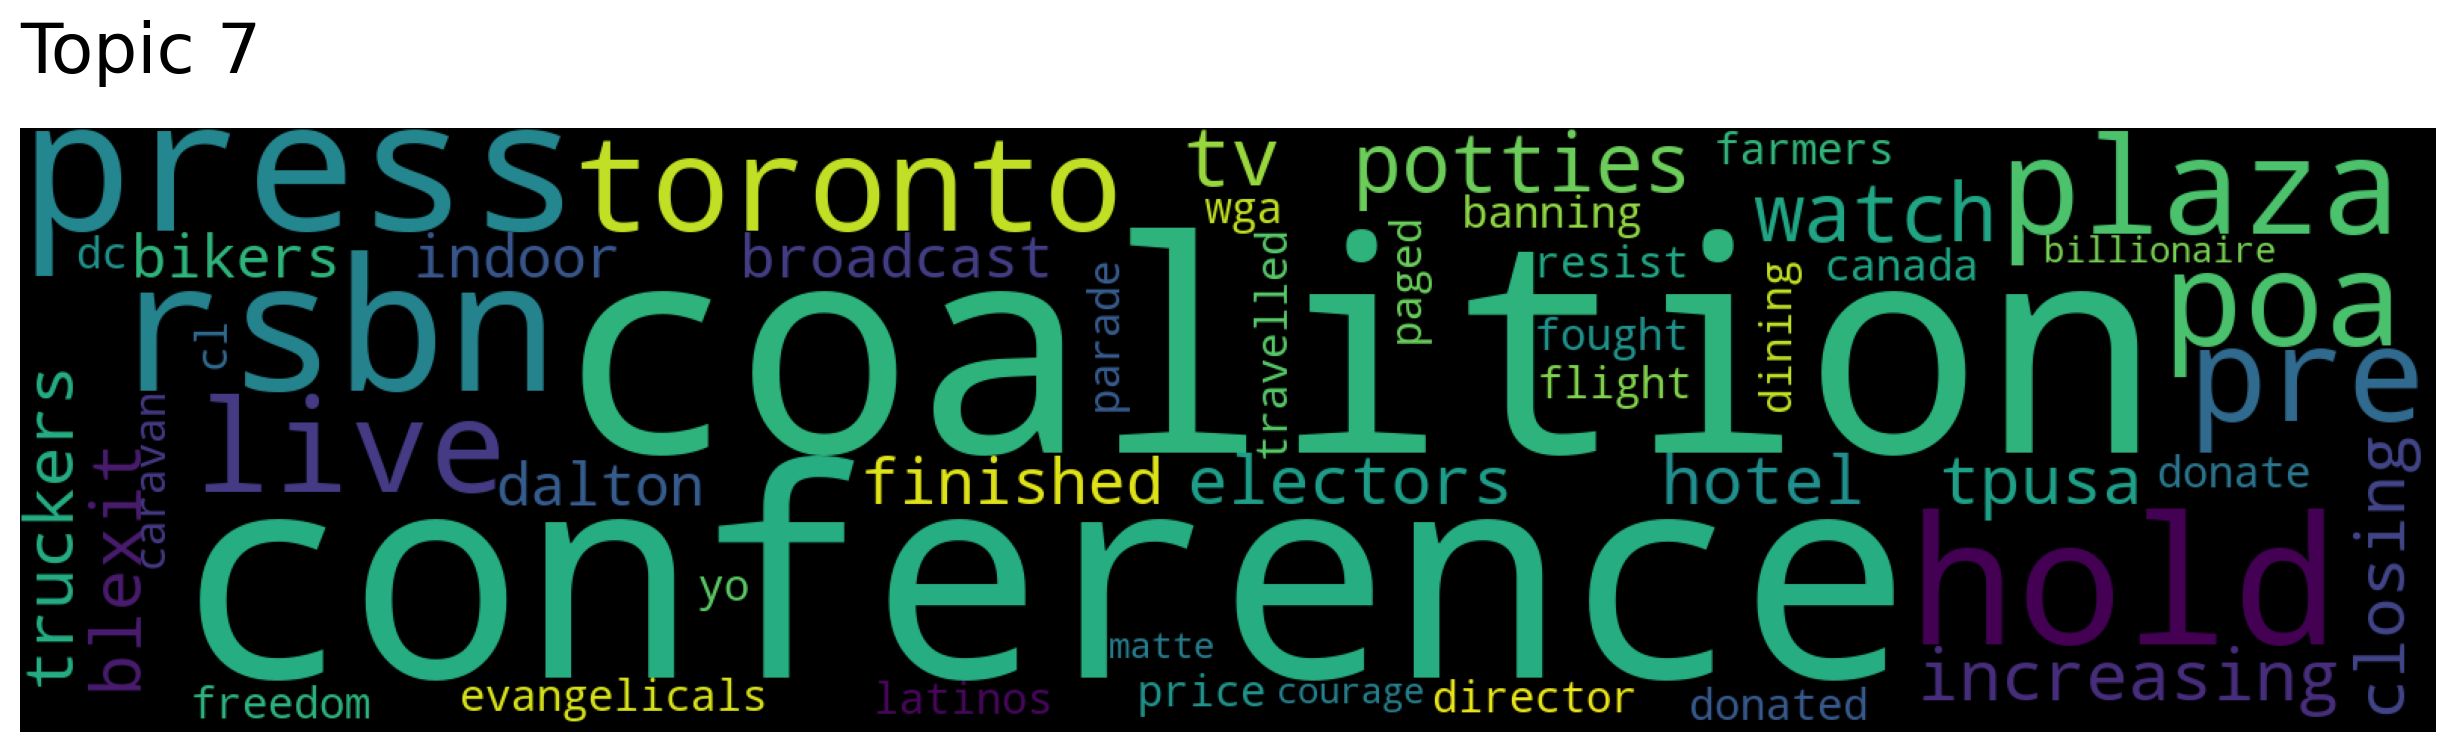

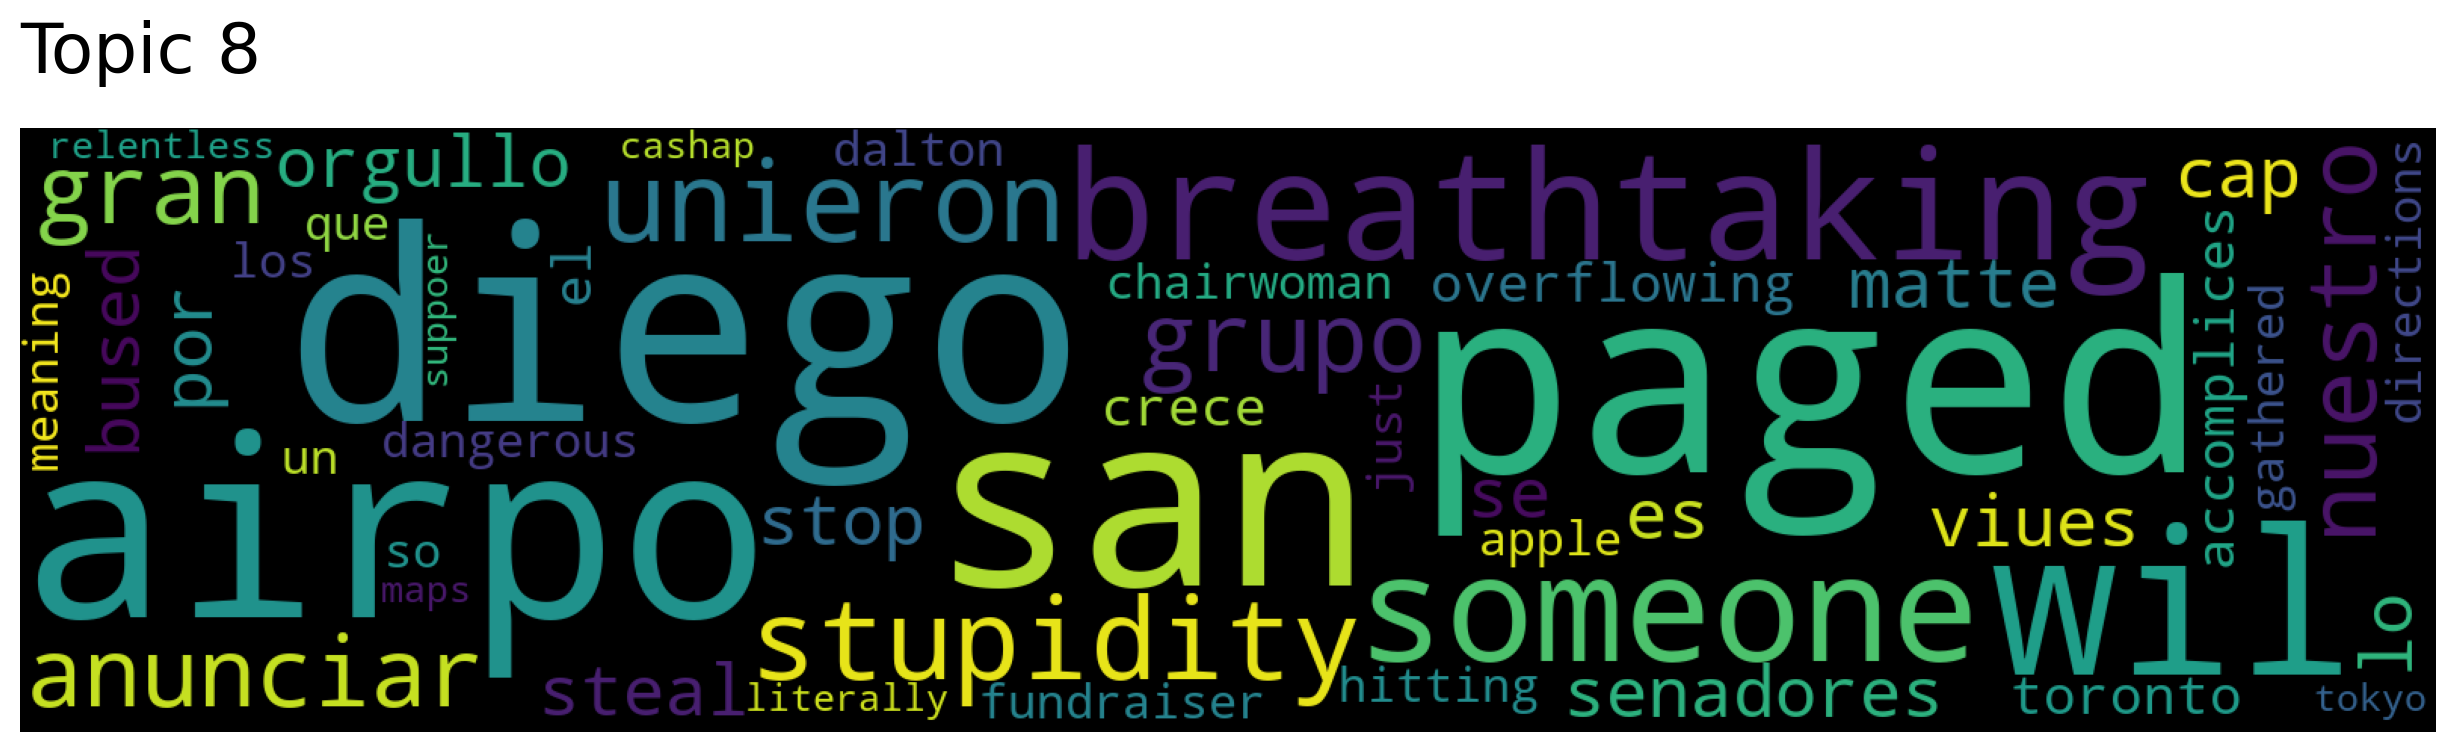

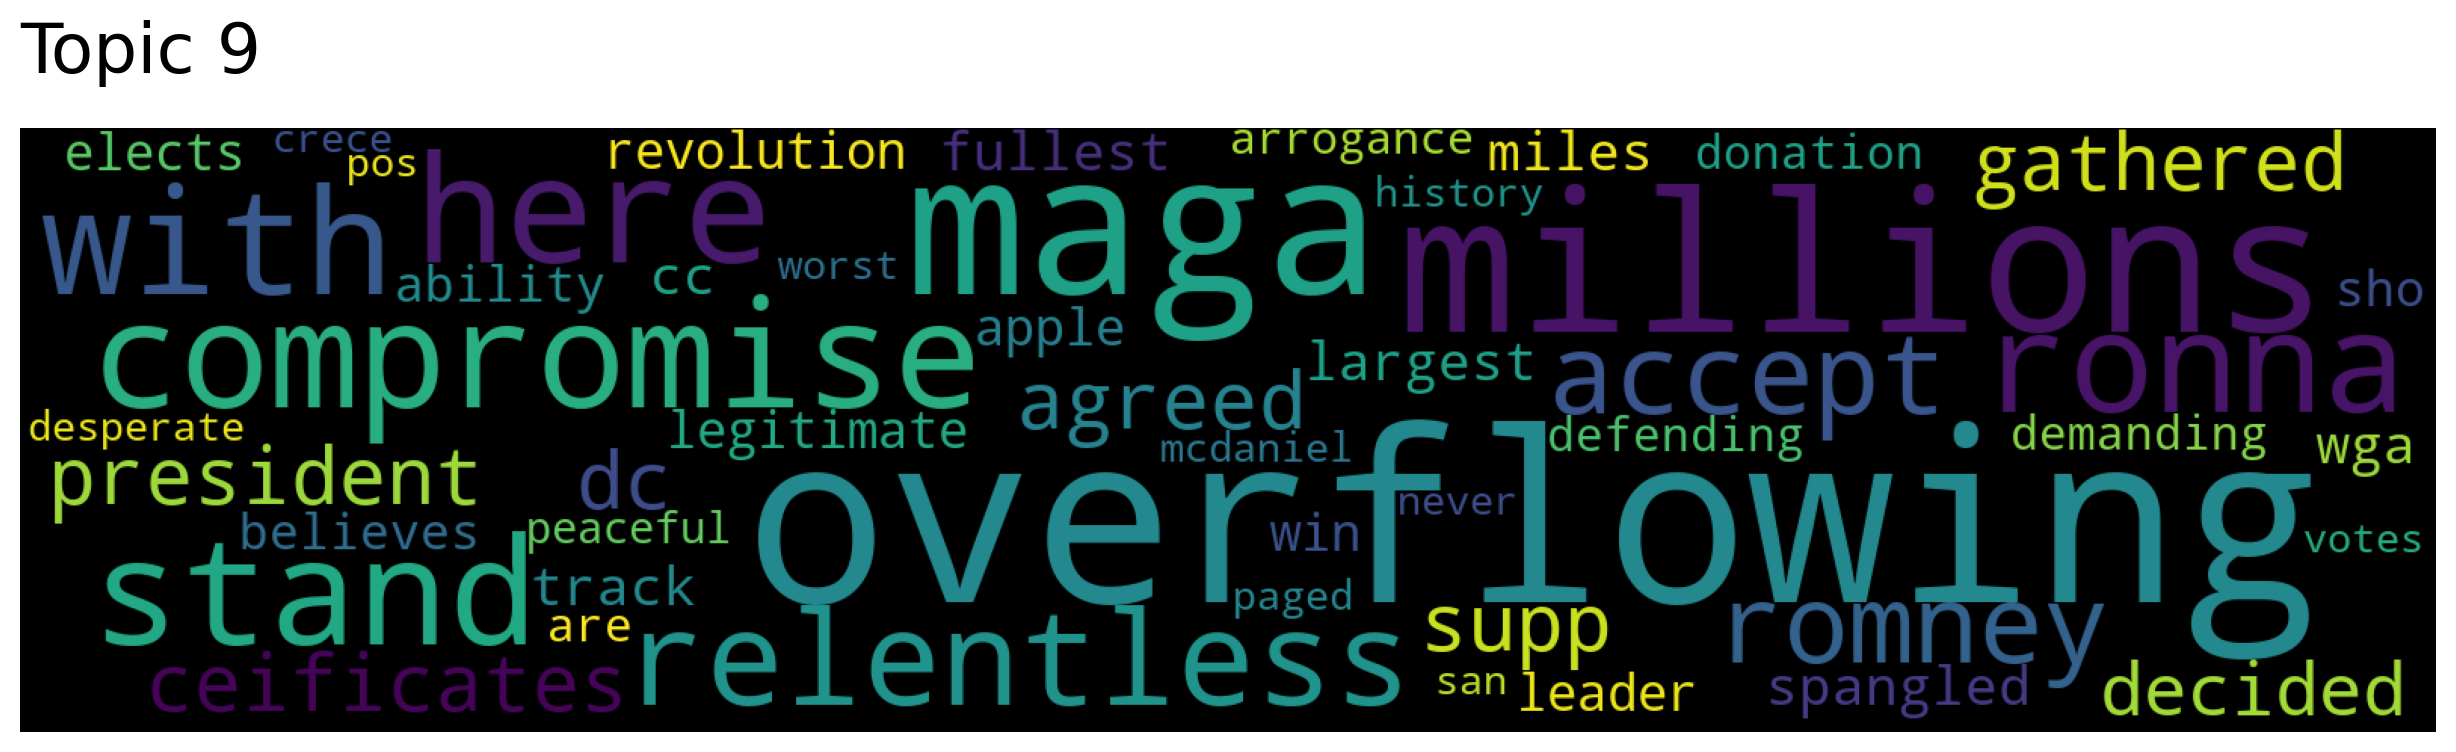

In [23]:
# topic_words, word_scores, topic_scores, topic_numbers = model.
for topic in topics_10:
    model.generate_topic_wordcloud(topic)